# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


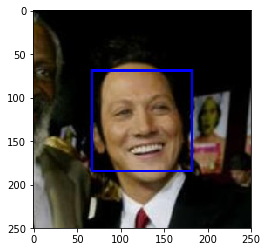

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
human_detections = 0
dog_detections = 0
for file in human_files_short:
    if face_detector(file):
        human_detections+=1
for file in dog_files_short:
    if face_detector(file):
        dog_detections+=1

print("Humans and dogs detected as human faces:\t{}% {}%" .format(100*(human_detections/len(human_files_short)),
                                                                100*(dog_detections/len(dog_files_short))))

        
## on the images in human_files_short and dog_files_short.


Humans and dogs detected as human faces:	100.0% 5.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [7]:
print(use_cuda)

True


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])])
    x = transform(img)
    x = x.unsqueeze(0)
    x = x.cuda()
    #print(x.shape)
    predictions = VGG16(x)
    #print(predictions)
    return predictions.argmax() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = VGG16_predict(img_path)
    if 151 <= prediction <= 268:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 1% of humans are detected as dogs and 99% of dogs are detected as dogs


(400, 400)
(224, 224)

Humans detected as dogs:	1.0%
Dogs detected as dogs: 	99.0%


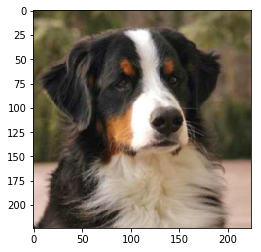

In [371]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
img = Image.open(dog_files_short[14])
#plt.imshow(img)
print(img.size)
resizee = transforms.Resize(256)
crop = transforms.CenterCrop(224)
img = resizee(img)
img = crop(img)
plt.imshow(img)
print(img.size)
#When performing the random crop i will get an error due to attempt of resizing to a larger image than.....
#...what the original image is. Instead of resizing it and then cropping this specific image i chose to look away from it.


human_detections = 0
dog_detections = 0
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

for file in human_files_short:
    if dog_detector(file):
        human_detections+=1
for i, file in enumerate(dog_files_short):
    if dog_detector(file):
        dog_detections+=1

print("\nHumans detected as dogs:\t{}%" .format(100*(human_detections/len(human_files_short))))
print("Dogs detected as dogs: \t{}%" .format(100*(dog_detections/len(dog_files_short))))                                                                


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [409]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
#print(glob("/data/dog_images/*/*/*"))

def get_datasets():
    dir_train = "/home/adrian/Udacity-Deep-Learning/project-dog-classification/dogImages/train"
    dir_valid = "/home/adrian/Udacity-Deep-Learning/project-dog-classification/dogImages/valid"
    dir_test = "/home/adrian/Udacity-Deep-Learning/project-dog-classification/dogImages/test"
    #print(dir_train)
    #print(dir_train)
    #print(os.listdir(dir_train[0]))

    
    transform_train = transforms.Compose([transforms.RandomResizedCrop(224),
                                   transforms.RandomHorizontalFlip(0.1),
                                   transforms.RandomVerticalFlip(0.1),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])])
    
    #Found several pictures of dogs that had shape < 224, therefore resizing it to > 224 then random cropping to 224
    transform_test = transforms.Compose([transforms.Resize(256),
                                         transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])
    target_transform = None
    train_set = datasets.ImageFolder(dir_train,transform=transform_train, target_transform=target_transform)
    valid_set = datasets.ImageFolder(dir_valid,transform=transform_test,target_transform=target_transform)
    test_set = datasets.ImageFolder(dir_train,transform=transform_test)
    
    return {'train': train_set, 'valid': valid_set, 'test': test_set}

    
def get_train_loaders():
    dir_train = "/home/adrian/Udacity-Deep-Learning/project-dog-classification/dogImages/train"
    dir_valid = "/home/adrian/Udacity-Deep-Learning/project-dog-classification/dogImages/valid"
    dir_test = "/home/adrian/Udacity-Deep-Learning/project-dog-classification/dogImages/test"
    #print(dir_train)
    #print(dir_train)
    #print(os.listdir(dir_train[0]))

    
    transform_train = transforms.Compose([transforms.RandomResizedCrop(224),
                                   transforms.RandomHorizontalFlip(0.1),
                                   transforms.RandomVerticalFlip(0.1),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])])
    
    #Found several pictures of dogs that had shape < 224, therefore resizing it to > 224 then random cropping to 224
    transform_test = transforms.Compose([transforms.Resize(256),
                                         transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])
    target_transform = None
    train_set = datasets.ImageFolder(dir_train,transform=transform_train, target_transform=target_transform)
    valid_set = datasets.ImageFolder(dir_valid,transform=transform_test,target_transform=target_transform)
    test_set = datasets.ImageFolder(dir_train,transform=transform_test)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=4,num_workers=0,shuffle=True)
    valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=4,num_workers=0,shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=4,num_workers=0,shuffle=True)
    return train_loader, valid_loader, test_loader

train_loader, valid_loader, test_loader = get_train_loaders()

print("Number of training images: {}" .format(len(train_loader.dataset)))
print("Number of validation images: {}" .format(len(valid_loader.dataset)))
print("Number of testing images: {}" .format(len(test_loader.dataset)))
### TODO: Write data loaders for training, validation, and test sets

## Specify appropriate transforms, and batch_sizes


Number of training images: 6680
Number of validation images: 835
Number of testing images: 6680


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: My code starts by augmenting the training images by picking a random square of size (224,224) from the input image. This was chosen in hope to teach the model to account for dogs that aren't centered in the images. The size is chosen as this is the "standard" for VGG nets. 

In addition I've added both horizontal and vertical flips in case some of the images are taken of dogs upside-down and to get images from both sides of the dogs. 

This is not performed on the validation and test data as i would like nothing but resizing the images when "testing" the performance of the model. 

An approach was used with increasing depths for each layer, going up to a depth of 128 (like we saw in the cifar example). The filters are of size 3x3 with a padding of 1 to keep the same size of the image when convolving. This is inspired from the VGG-net and its simplicty, hoping that it can be used here too. The idea is to start with this, and keep adding convolution layers / increase filter sizes to gather more information if the results are insufficient.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [505]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.CNN = nn.Sequential(OrderedDict([
                    #224x224x3
                    ('conv1', nn.Conv2d(3, 64, 5, padding=2)),
                    #224x224x64
                    ('relu1', nn.ReLU()),
                    ('pool1', nn.MaxPool2d(2,2)),
                    #128x128x64
                    ('conv4', nn.Conv2d(64, 64, 5, padding=2)),
                    ('relu4', nn.ReLU()),
                    ('pool2', nn.MaxPool2d(2,2)), 
                    #56x56x128
                    ('conv6', nn.Conv2d(64,128,3,padding=1)),
                    ('relu6', nn.ReLU()),
                    ('conv7', nn.Conv2d(128, 128, 3, padding=1)),
                    ('relu7', nn.ReLU()),
                    ('pool3', nn.MaxPool2d(2,2)),
                    #28x28x256
                    ('conv9', nn.Conv2d(128,128,3, padding=1)),
                    ('relu9', nn.ReLU()),
                    ('pool4', nn.MaxPool2d(2,2)),
                    #14x14x512
                    ('conv10', nn.Conv2d(128,256,3, padding=1)),
                    ('relu10', nn.ReLU()),
                    ('pool5', nn.MaxPool2d(2,2)),
                    #7x7x128
                    ('conv11', nn.Conv2d(256,512,3, padding=1)),
                    ('relu11', nn.ReLU()),
                    ('pool6', nn.MaxPool2d(2,2)),
                    #3x3x128
                    ]))
                    
        self.classifier = nn.Sequential(OrderedDict([
                    ('norm', nn.BatchNorm1d(3*3*512)),
                    ('Linear1', nn.Linear(3*3*512, 133)),
                    ('output', nn.Softmax(dim=0))]))
    
    def forward(self, x):
        ## Define forward behavior
        x = self.CNN(x)
        x = x.view(-1, 3*3*512)        
        x = self.classifier(x)
        return x

    
def weights_init_normal(m):
    '''Takes in a module and initializes all linear layers with weight
       values taken from a normal distribution.'''
    
    classname = m.__class__.__name__
    if classname.find('Linear') !=-1:
        y = 1/np.sqrt(m.in_features)
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
    
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
model_scratch.apply(weights_init_normal)

print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (CNN): Sequential(
    (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (relu1): ReLU()
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (relu4): ReLU()
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu6): ReLU()
    (conv7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu7): ReLU()
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu9): ReLU()
    (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu10): ReLU()
    (pool5): MaxPool

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ Using the starting point explained above (in the last answer), using an experimental approach developed the network structure. With unsufficient results for one architecture i would try to increase the depths, and if that proved unsuficcient, try to add several layers within each pooling layer to extract more features. The thought was that having more layers and larger filter-sizes could be able to obtain more information about the specific dog breeds that look alike. 

It was also desired by me to have a low number of inputs to the fully connected layer (classifier) so that the classification process would become easier. Having a low number of inputs means fewer weights to consider, therefore the image is reduced to a 3x3 width and height. This started at 28x28 in the first iteration, and through experimenting ended up at 3x3. 

During times of trouble, initialization of weights popped into mind which gave a small increase in performance when using a normal distribution. This was inspired by a previous chapter about initialization of weights. 

Early i struggled with close to no fall in training/validation loss during training, which showed to be due to gradients being close to 0 (magnitudes of 10⁻6). A solution to this was to use batch-normalization on the inputs from the CNN, this drastically improved the training process. Softmax was used to get a probibalistic output for multiple classes.  

A dropout layer could be added, but due to effectiveness on test set and time taken to train the model i decided to move on without trying a dropout layer

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [506]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [507]:
#Found that some of the files were truncated...
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [508]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx,(data,target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            optimizer.zero_grad()
            output = model(data)
            #print(target)
            #print(output)
            #print(list(model.parameters())[0].grad)

            loss = criterion(output, target)
            loss.backward()
#             for param in model.parameters():
#                 print(param.grad.data.sum())

#             # start debugger
#             import pdb; pdb.set_trace()


            optimizer.step()
            train_loss += loss.item()*data.size(0)
            
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx,(data,target) in enumerate(loaders['valid']):
            
            #target = torch.Tensor([target]).long()
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            output = model(data)
            
            #print("now in validation")
            loss = criterion(output, target)
            valid_loss += loss.item()*data.size(0)

            
            ## update the average validation loss
        
        
        train_loss = train_loss/len(loaders['train'])
        valid_loss = valid_loss/len(loaders['valid'])
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
    # return trained model
    return model

In [519]:
loaders_scratch = {}
loaders_scratch['train'] = train_loader
loaders_scratch['valid'] = valid_loader
loaders_scratch['test'] = test_loader

#loaders_scratch = [train_loader, valid_loader]
# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 19.285450 	Validation Loss: 19.157928
Validation loss decreased (inf --> 19.157928).  Saving model ...
Epoch: 2 	Training Loss: 19.141177 	Validation Loss: 19.029250
Validation loss decreased (19.157928 --> 19.029250).  Saving model ...
Epoch: 3 	Training Loss: 19.063891 	Validation Loss: 18.960940
Validation loss decreased (19.029250 --> 18.960940).  Saving model ...
Epoch: 4 	Training Loss: 18.970514 	Validation Loss: 18.890098
Validation loss decreased (18.960940 --> 18.890098).  Saving model ...
Epoch: 5 	Training Loss: 18.947580 	Validation Loss: 18.809979
Validation loss decreased (18.890098 --> 18.809979).  Saving model ...
Epoch: 6 	Training Loss: 18.913665 	Validation Loss: 18.814597
Epoch: 7 	Training Loss: 18.856728 	Validation Loss: 18.700400
Validation loss decreased (18.809979 --> 18.700400).  Saving model ...
Epoch: 8 	Training Loss: 18.837283 	Validation Loss: 18.650629
Validation loss decreased (18.700400 --> 18.650629).  Saving model ...
Epoch

KeyboardInterrupt: 

## I decided to stop the training after 82 epochs.....

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [406]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    model.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(loaders['test']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update average test loss 
            test_loss += loss.item()*data.size(0)
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
            
    test_loss = test_loss/len(loaders['test'].dataset)        
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    

In [520]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [521]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.414742


Test Accuracy: 17% (1199/6680)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [395]:
## TODO: Specify data loaders
#Using the same function as defined earlier

dog_train_loader, dog_valid_loader, dog_test_loader = get_train_loaders()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [402]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
class DogNet(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(DogNet, self).__init__()
        ## Define layers of a CNN
        self.CNN = models.vgg16(pretrained=True).features
        
        self.vgg_classifier = models.vgg16(pretrained=True).classifier
    
    def forward(self, x):
        ## Define forward behavior
        x = self.CNN(x)
        x = x.view(-1, 25088) 
        x = self.vgg_classifier(x)
        return x

    
def weights_init_normal(m):
    '''Takes in a module and initializes all linear layers with weight
       values taken from a normal distribution.'''
    
    classname = m.__class__.__name__
    if classname.find('Linear') !=-1:
        y = 1/np.sqrt(m.in_features)
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
    
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_transfer = DogNet()

for param in model_transfer.parameters():
    param.requires_grad = False
      
model_transfer.vgg_classifier[6]=nn.Linear(4096,133)




# check if CUDA is available
use_cuda = torch.cuda.is_available()


if use_cuda:
    model_transfer = model_transfer.cuda()

In [397]:
for name, param in model_transfer.named_parameters():
    if param.requires_grad:
        print(name, param.data)

vgg_classifier.6.weight tensor([[ 0.0109, -0.0035,  0.0020,  ..., -0.0053, -0.0115,  0.0064],
        [ 0.0037, -0.0127,  0.0064,  ...,  0.0033, -0.0146, -0.0086],
        [ 0.0077, -0.0074, -0.0034,  ..., -0.0045, -0.0058,  0.0086],
        ...,
        [ 0.0071,  0.0044, -0.0116,  ...,  0.0082, -0.0002, -0.0093],
        [ 0.0029, -0.0136,  0.0054,  ..., -0.0052, -0.0141,  0.0040],
        [-0.0045, -0.0059, -0.0131,  ..., -0.0093, -0.0009, -0.0055]],
       device='cuda:0')
vgg_classifier.6.bias tensor([ 0.0035,  0.0128,  0.0025, -0.0126, -0.0038,  0.0099,  0.0081, -0.0088,
        -0.0120,  0.0100, -0.0096, -0.0058,  0.0016,  0.0113,  0.0016,  0.0103,
        -0.0002,  0.0112, -0.0106,  0.0112,  0.0025, -0.0013,  0.0141, -0.0145,
         0.0149, -0.0147,  0.0035, -0.0015,  0.0075, -0.0034, -0.0008, -0.0138,
         0.0037, -0.0071, -0.0082,  0.0135,  0.0012,  0.0090, -0.0001, -0.0049,
         0.0096, -0.0127, -0.0025,  0.0134, -0.0040,  0.0093, -0.0060, -0.0013,
        -0.0034,

In [398]:
print(model_transfer)

DogNet(
  (CNN): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(2

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I decided to use the model provided by VGG as a starting point and map the output layer to 133 output nodes. If this proved to be unsufficient i would try to remove a linear layer from the classifier and alter the number of nodes in this layer. An important part was to freeze the weights from the pre-trained model, so that these are used as feature extractors instead of being trained.

Changing the last layer to fit the current problem from the dataset proved to be more than enough to get the required accuracy for this task. This does to me seem realistic as the dataset is so small, meaning that the lassifier layers doesn't have to be changed that much. Had it been a larger dataset it might be needed to do larger changes to the classification layers. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [403]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.vgg_classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [404]:
# train the model
n_epochs = 15
loaders_transfer = dict()
loaders_transfer['train'] = dog_train_loader
loaders_transfer['valid'] = dog_valid_loader
loaders_transfer['test'] = dog_test_loader

model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 11.739035 	Validation Loss: 4.990242
Validation loss decreased (inf --> 4.990242).  Saving model ...
Epoch: 2 	Training Loss: 6.732201 	Validation Loss: 3.230567
Validation loss decreased (4.990242 --> 3.230567).  Saving model ...
Epoch: 3 	Training Loss: 5.633938 	Validation Loss: 2.574361
Validation loss decreased (3.230567 --> 2.574361).  Saving model ...
Epoch: 4 	Training Loss: 4.992476 	Validation Loss: 2.262355
Validation loss decreased (2.574361 --> 2.262355).  Saving model ...
Epoch: 5 	Training Loss: 4.697567 	Validation Loss: 2.070114
Validation loss decreased (2.262355 --> 2.070114).  Saving model ...
Epoch: 6 	Training Loss: 4.583724 	Validation Loss: 1.973183
Validation loss decreased (2.070114 --> 1.973183).  Saving model ...
Epoch: 7 	Training Loss: 4.322685 	Validation Loss: 1.858107
Validation loss decreased (1.973183 --> 1.858107).  Saving model ...
Epoch: 8 	Training Loss: 4.259547 	Validation Loss: 1.774686
Validation loss decreased (1.8581

### I decided to only run the training for 15 epochs because of the great results. Could likely train more to get a very very high accuracy, but decided to save some time.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [407]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.255862


Test Accuracy: 93% (6245/6680)


###  Please checkout my test function and see why i get so different test loss compared to training and validation loss

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [435]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

data_transfer = get_datasets()

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
#print(class_names[0])

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                         std=[0.229, 0.224, 0.225])])
    img = transform(img)
    img = img.unsqueeze(0)
    if use_cuda: 
        img = img.cuda()
    output = model_transfer(img)
    _, predictions = torch.max(output,dim=1)
    
    breed = class_names[predictions]
    
    
    return breed


In [434]:
predict_breed_transfer(dog_files[7])

'Australian cattle dog'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [516]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path) and dog_detector(img_path):
        print("Detected both human and dog in this picture, the dog breed is: {}" .format(predict_breed_transfer(img_path)))
    elif face_detector(img_path):
        print('Its a human! He/she looks like a {}!' .format(predict_breed_transfer(img_path)))
    elif dog_detector(img_path):
        print("It's a dog! The breed is: {}" .format(predict_breed_transfer(img_path)))
    else:
        print("Neither a dog or a human was detected, something is fishy!")
    


In [517]:
run_app(dog_files[6])


It's a dog! The breed is: Australian cattle dog


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ It does a pretty good job, but it can seen that it makes some mistakes. The husky was predicted as an Alaskan Malamute, which is very similar!! So i can understand the confusion. The dachs however was mistaken for German pinscher, which is quite different. Also, it understood that Shrek is neither dog or human, which is nice! Jennifer Aniston is according to the program not a human (nor a dog), which is news to me. It also does a decent job of detecting the dog breed in the image with both a dog and a human! Cannot validate this though, as im not sure what breed this is myself....

A few comments for improvement: 

Better classification of the proper breed, even when they are similar. 
Better detection of Humans.
Could be able to classify both dogs and humans in the same picture, classify the proper race of the dog and what breed the human looks like. 

In [510]:
import fnmatch
path = '/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/'
imagefiles = [os.path.join(subdir,f)
for subdir, dirs, files in os.walk(path)
    for f in fnmatch.filter(files, '*.jpg')]

In [511]:
print(imagefiles)

['/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/corgi.jpg', '/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/dachs.jpg', '/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/shrek.jpg', '/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/labrador.jpg', '/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/robertJr.jpg', '/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/english_bulldog.jpg', '/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/golden_retriver.jpg', '/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/dog_and_human.jpg', '/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/jennifer.jpg', '/home/adrian/Udacity-Deep-Learning/project-dog-classification/test_images/husky.jpg']


In [512]:
content = []
for item in imagefiles:
    content.append(item[:item.find('.jpg')].replace(path,""))

In [513]:
print(content)

['corgi', 'dachs', 'shrek', 'labrador', 'robertJr', 'english_bulldog', 'golden_retriver', 'dog_and_human', 'jennifer', 'husky']


In [ ]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    img = Image.open(imagefiles[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()  


In [518]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.



## suggested code, below
for i, file in enumerate(imagefiles):
    print("The content is: {}" .format(content[i]))
    run_app(file)
    print()

The content is: corgi
It's a dog! The breed is: Pembroke welsh corgi

The content is: dachs
It's a dog! The breed is: German pinscher

The content is: shrek
Neither a dog or a human was detected, something is fishy!

The content is: labrador
It's a dog! The breed is: Labrador retriever

The content is: robertJr
Its a human! He/she looks like a Nova scotia duck tolling retriever!

The content is: english_bulldog
It's a dog! The breed is: Bulldog

The content is: golden_retriver
It's a dog! The breed is: Golden retriever

The content is: dog_and_human
Detected both human and dog in this picture, the dog breed is: Borzoi

The content is: jennifer
Neither a dog or a human was detected, something is fishy!

The content is: husky
It's a dog! The breed is: Alaskan malamute

